# Atividade 3: Pandas

**Data:**  23/05/2024  
**Nome:** Icaro Lima

## Instruções

Para realizar esta atividade, certifique-se de que possui os arquivos `london12.csv`. Esses arquivos podem ser baixados do ColabWeb.

Acrescente suas próprias células para responder os enunciados. Ao finalizar, submeta a atividade por meio do ColabWeb.

Primeiro: configuração do *notebook*.

- NumPy: manipulação eficiente de matrizes
- Pandas: séries e tabelas (*data frames*) com índices
- Seaborn: ferramentas para manipulação de gráficos e bases de dados
- PyPlot: versão para Python de várias funções gráficas que imitam funcionalidades do Matlab

O comando `sns.set()` faz com que o pacote Seaborn mude o esquema de cores e apresentação dos gráficos do PyPlot. Você pode, se quiser, remover esse comando ou explorar suas opções.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Exercício 1

> Carregue o conjunto de dados das Olimpíadas de 2012. Verifique:
>
> - Quantas linhas e colunas foram carregadas.
> - Quais são as colunas da base. Todas podem ser usadas como atributos?

In [2]:
from google.colab import files
uploaded = files.upload()

Saving london12.csv to london12.csv


In [3]:
londres = "london12.csv"
data = pd.read_csv("/content/london12.csv")
print(data)

          ID  Age  Height  Weight Sex  Total       Sport
0          0   23   170.0    60.0   M      0        Judo
1          1   33   193.0   125.0   M      0   Athletics
2          2   30   187.0    76.0   M      0   Athletics
3          3   24     NaN     NaN   M      0      Boxing
4          4   26   178.0    85.0   F      0   Athletics
...      ...  ...     ...     ...  ..    ...         ...
10379  10379   24   171.0    87.0   F      0   Athletics
10380  10380   28   172.0    56.0   F      0   Athletics
10381  10381   27   180.0    87.0   M      0    Handball
10382  10382   25   173.0    62.0   F      0   Athletics
10383  10383   24   221.0   110.0   M      0  Basketball

[10384 rows x 7 columns]


> Verifique os tipos de dados das colunas.

In [4]:
print(data.dtypes)

ID          int64
Age         int64
Height    float64
Weight    float64
Sex        object
Total       int64
Sport      object
dtype: object


> O que significa `Sport     objetct`? Porque essa coluna não é um tipo primitivo, como `int64` ou `float64`? Pesquise e responda, de acordo com o que você encontrou, mas usando suas próprias palavras:

**Resposta**: O tipo objetct é um tipo genérico que pode conter qulaquer tipo de dados, mas é comumente usando em strings.  

> A coluna `ID` pode ser usada como um atributo? Por quê?

**Resposta:** Sim, pois os nome da coluna é um strings válida para os atributos do Python

> Remova a coluna `ID` usando o método `DataFrame.drop`.

In [5]:
data = data.drop(columns=['ID'])

> Verifique as colunas remanescentes. Use `DataFrame.head` ou acesse diretamente o índice das colunas. As colunas restantes devem ser `Age`, `Height`, `Weight`, `Sex`, `Total` e `Sport`.

In [6]:
print(data)

       Age  Height  Weight Sex  Total       Sport
0       23   170.0    60.0   M      0        Judo
1       33   193.0   125.0   M      0   Athletics
2       30   187.0    76.0   M      0   Athletics
3       24     NaN     NaN   M      0      Boxing
4       26   178.0    85.0   F      0   Athletics
...    ...     ...     ...  ..    ...         ...
10379   24   171.0    87.0   F      0   Athletics
10380   28   172.0    56.0   F      0   Athletics
10381   27   180.0    87.0   M      0    Handball
10382   25   173.0    62.0   F      0   Athletics
10383   24   221.0   110.0   M      0  Basketball

[10384 rows x 6 columns]


> A coluna `Total` representa o total de medalhas que o atleta ganhou na competição. Verifique nessa coluna quantos atletas receberam pelo menos uma medalha. O resultado deve ser 493.

In [7]:
atletas_com_medalha = (data['Total'] > 0).sum()
print(atletas_com_medalha)

493


## Exercício 2

> Usando `idxmax`, encontre o índice da linha que contém o atleta mais velho da competição.

In [8]:
pos_mais_velho = (data['Age']).idxmax()
print(pos_mais_velho)

3758


> Utilize esse índice para recuperar os dados desse atleta.

In [9]:
info = data.loc[3758]
print(info)

Age               71
Height         168.0
Weight          61.0
Sex                M
Total              0
Sport     Equestrian
Name: 3758, dtype: object


**Dica:** utilize uma condição sobre o atributo `Sex` para gerar uma máscara. Depois use essa máscara para indexar o *data frame*.

In [10]:
mascara = data['Sex'] == 'M'
data_mascarado = data[mascara]
print(data_mascarado)

       Age  Height  Weight Sex  Total       Sport
0       23   170.0    60.0   M      0        Judo
1       33   193.0   125.0   M      0   Athletics
2       30   187.0    76.0   M      0   Athletics
3       24     NaN     NaN   M      0      Boxing
5       27   182.0    80.0   M      0    Handball
...    ...     ...     ...  ..    ...         ...
10371   24   163.0    66.0   M      0        Judo
10375   24   177.0    84.0   M      0   Wrestling
10378   19   170.0    65.0   M      0    Football
10381   27   180.0    87.0   M      0    Handball
10383   24   221.0   110.0   M      0  Basketball

[5756 rows x 6 columns]


> Quem são os 15 atletas mais novos?

In [11]:
idade_media = data['Age'].mean()
nova_mascara = data['Age'] < idade_media
atletas = data[nova_mascara]
atletas_15 = atletas.head(15)
print(atletas_15)


    Age  Height  Weight Sex  Total                  Sport
0    23   170.0    60.0   M      0                   Judo
3    24     NaN     NaN   M      0                 Boxing
4    26   178.0    85.0   F      0              Athletics
7    23   187.0    75.0   M      0               Football
9    19   170.0     NaN   M      0                 Boxing
14   22   171.0    62.0   M      0               Football
15   19   167.0     NaN   F      0  Synchronised Swimming
16   22   175.0    63.0   M      0               Football
17   25   162.0    69.0   M      0          Weightlifting
18   18   167.0     NaN   M      0                 Boxing
19   25   175.0    85.0   M      0          Weightlifting
20   19   170.0     NaN   F      0  Synchronised Swimming
21   26   171.0    60.0   F      0             Volleyball
24   20   183.0     NaN   M      0                 Boxing
25   26   165.0    55.0   F      0              Athletics


> Gere um histograma das idades dos homens

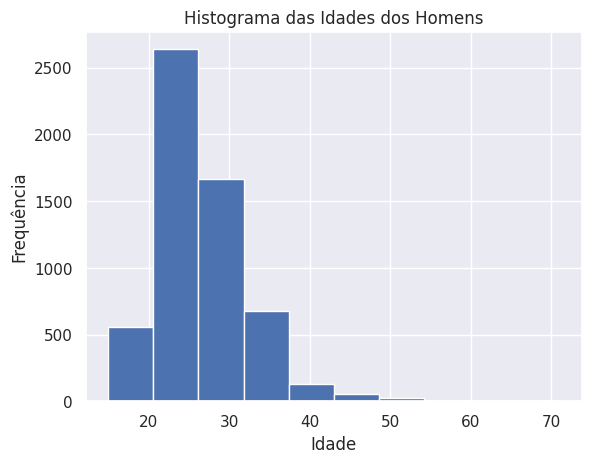

In [12]:
idade_homens = data[mascara]['Age']
plt.hist(idade_homens)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma das Idades dos Homens')
plt.grid(True)
plt.show()

> Gere um histograma das idades das mulheres

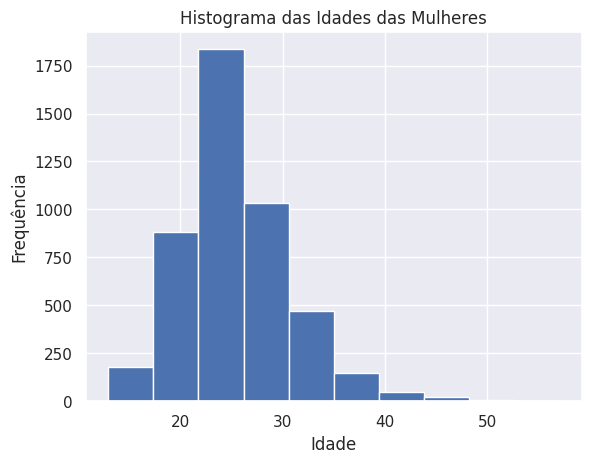

In [13]:
mascara_f = data["Sex"] == 'F'
idade_mulheres = data[mascara_f]['Age']
plt.hist(idade_mulheres)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma das Idades das Mulheres')
plt.grid(True)
plt.show()

> Gere um histograma asteticamente agradável que mostre as distribuições de idades dos homens e das mulheres. O histograma deve ter duas curvas. Pesquise por opções como transparência, borda, número de *bins* etc.

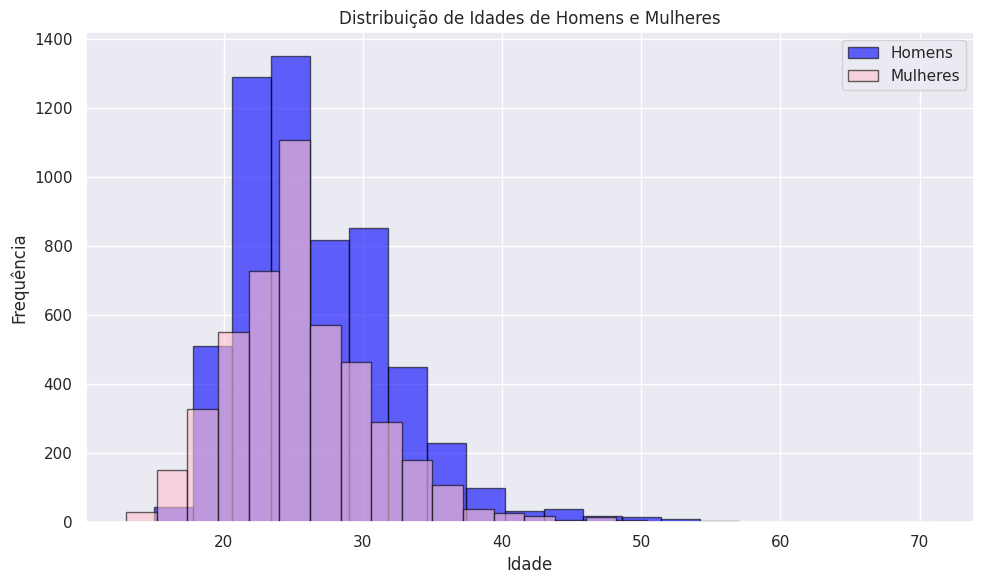

In [14]:
plt.figure(figsize=(10,6))
plt.hist(idade_homens, bins=20, color='blue', edgecolor='black', alpha=0.6, label='Homens')
plt.hist(idade_mulheres, bins=20, color='pink', edgecolor='black', alpha=0.6, label='Mulheres')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades de Homens e Mulheres')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Exercício 3

Neste exercício você deverá utilizar a função `pie` do PyPlot ou o método `plot.pie` da própria série do Pandas para gerar um gráfico de "pizza".

Você pode obter os dados a partir de um `value_counts` ou usando a função `histogram` do NumPy.

> Faça um gráfico circular (*pie chart*) comparando o número de atletas que não ganharam nenhuma medalha com o número de atletas que ganharam alguma medalha.

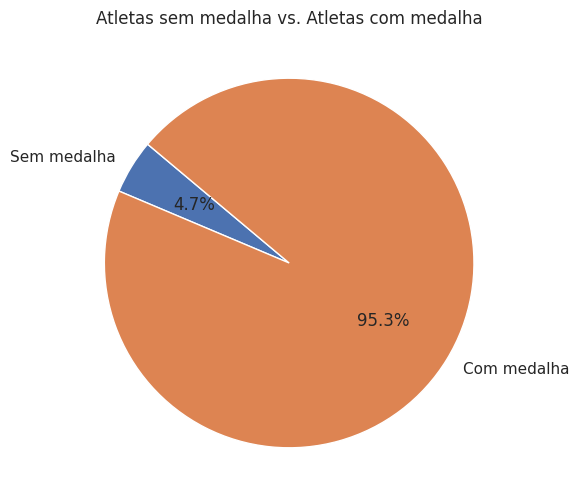

In [15]:
vencedors = (data['Total'] == 0).sum()
perdedores = (data['Total'] > 0).sum()

plt.figure(figsize=(8, 6))
plt.pie([perdedores, vencedors], labels=['Sem medalha', 'Com medalha'], autopct='%1.1f%%', startangle=140)
plt.title('Atletas sem medalha vs. Atletas com medalha')
plt.show()

In [16]:
sns.set_palette('pastel')

In [17]:
medalhas = data['Total'].value_counts()


> Como um teste, refaça o gráfico do item anterior, passando agora o argumento `explode=[0, 0.2]` para a função `pie`. Observe o que acontece com o segmento do gráfico que representa os atletas medalhistas.

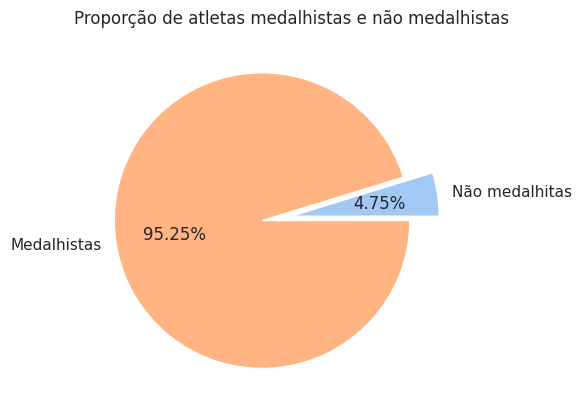

In [18]:
plt.pie([perdedores, vencedors],
        autopct='%.2f%%', explode=[0, 0.2],
        labels=['Não medalhitas', 'Medalhistas']);
plt.title('Proporção de atletas medalhistas e não medalhistas');

> Gere um gráfico circular (gráfico de setores ou *pie*) para atletas que ganharam uma medalha e atletas que ganharam duas ou mais medalhas.

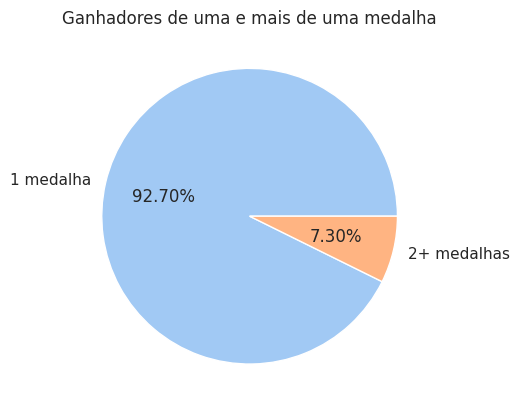

In [19]:
uma_medalha = (data['Total'] == 1).sum()
mais_de_uma_medalha = (data['Total'] > 1).sum()

plt.pie([uma_medalha, mais_de_uma_medalha],
        labels=['1 medalha', '2+ medalhas'],
        autopct='%.2f%%');
plt.title('Ganhadores de uma e mais de uma medalha');

> Utilizando *subplots*, faça uma figura que contém os dois gráficos anteriores, lado a lado, representando duas visões do total de medalhas. A figura deverá ser parecida com a que aparece no *slide* 38 da apresentação `04-Pandas`.

**Dica:** utilize `plt.subplots_adjust(right=1.2)` ou outro vaor adequado para ajustar os *subplots*

**Dica:** você pode utilizar `\n` para fazer quebras de linha no título

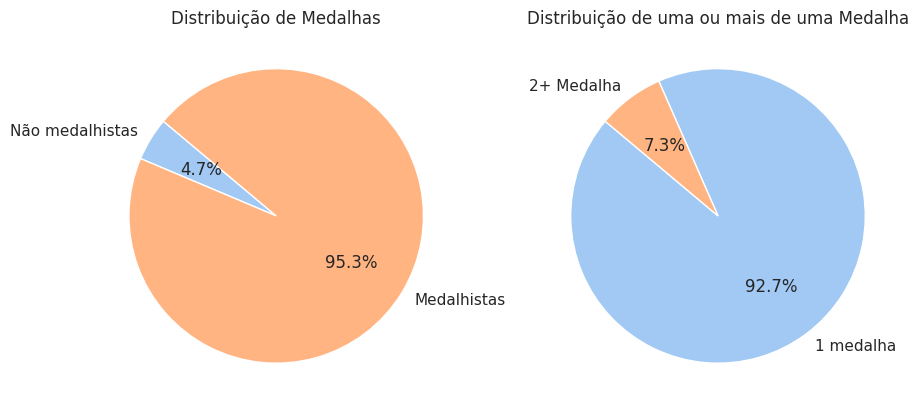

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie([perdedores, vencedors], labels=['Não medalhistas', 'Medalhistas'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribuição de Medalhas')
axs[1].pie([uma_medalha, mais_de_uma_medalha], labels=['1 medalha', '2+ Medalha'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribuição de uma ou mais de uma Medalha')

plt.subplots_adjust(right=0.8)
plt.show()

## Exercício 4

> Existem dados ausentes no *data frame*? Verifique o método `isna`.

**Dica:** o resultado de `isna` é um *data frame*, mas você pode sintetizar esse resultado usando funções de agregação, como `.any` ou `.all`.

**Dica:** você pode especificar um eixo para agregar ao longo das linhas ou das colunas do *data frame*. Caso você especifique `axis=None`, então o resultado será aplicado sobre todos os valores do *data frame*.

In [21]:
data.isna().any(axis=0)

Age       False
Height     True
Weight     True
Sex       False
Total     False
Sport     False
dtype: bool

> Especificamente para o atributo *peso*, existem valores ausentes?

In [22]:
data['Weight'].isna().any()

True

> Qual a altura média de todos os atletas masculinos? E a dos atletas femininos?

In [23]:
altura_masculina = data[data['Sex'] == 'M']['Height'].mean()
altura_feminina = data[data['Sex'] == 'F']['Height'].mean()

print(altura_masculina)
print(altura_feminina)

182.37713120830244
170.2414727806641


> Qual o peso médio dos atletas?

In [24]:
peso_masculina = data[data['Sex'] == 'M']['Weight'].mean()
peso_feminina = data[data['Sex'] == 'F']['Weight'].mean()

print(peso_masculina)
print(peso_feminina)

80.57586547972305
63.21091627562361


> Substitua a altura e o peso de todos os atletas com valores ausentes por médias das amostras

In [25]:
media_altura = data['Height'].mean()
media_peso = data['Weight'].mean()

data['Height'].fillna(media_altura)
data['Weight'].fillna(media_peso)

data.isna().any(axis=0)

Age       False
Height     True
Weight     True
Sex       False
Total     False
Sport     False
dtype: bool

> Crie um atributo chamado BMI (*body mass index*) utilizando a relação a seguir.

In [26]:
BMI = data['Weight'] / ((data['Height']/100) ** 2)

$$\text{BMI} = \displaystyle\frac{\text{peso}}{\text{altura}^2}~~\text{kg/m}^2$$

> Gere um histograma da distribuição do IMC (índice de massa corpórea—BMI).

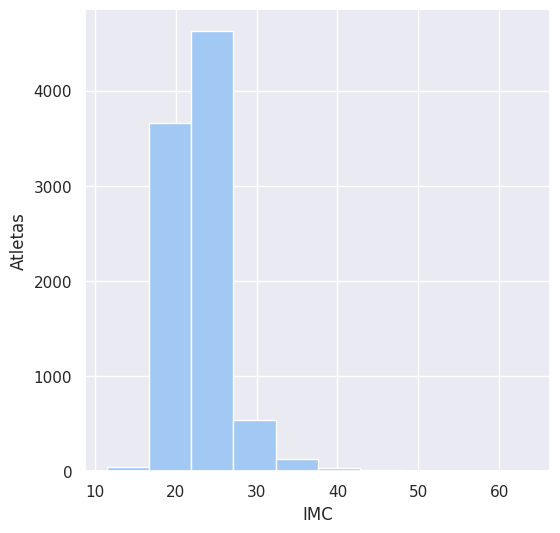

In [27]:
plt.figure(figsize=(6,6))
plt.hist(BMI)
plt.ylabel('Atletas')
plt.xlabel('IMC')
plt.grid(True)
plt.show()

> Faça histogramas para estudar as distribuições de IMC de homens e mulheres. Existe diferença no IMC de um gênero para outro?

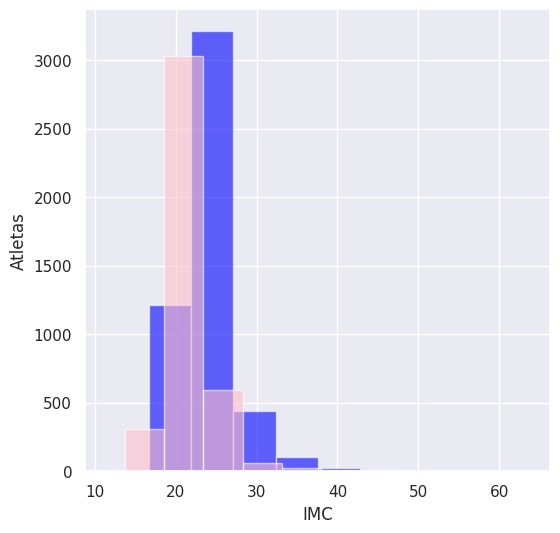

In [28]:
data['BMI'] = BMI

bmi_homem = data[data['Sex'] == 'M']['BMI']
bmi_mulher = data[data['Sex'] == 'F']['BMI']

plt.figure(figsize=(6,6))
plt.hist(bmi_homem, color ='blue', alpha=0.6, label='Homens')
plt.hist(bmi_mulher,color ='pink', alpha=0.6, label='Mulheres')
plt.ylabel('Atletas')
plt.xlabel('IMC')
plt.grid(True)
plt.show()

#Sim, existe diferença entre os IMC's

> Os dados possuem uma cauda muito longa à direita. Faça um histograma apenas dos atletas que possuem IMC maior ou igual a 30

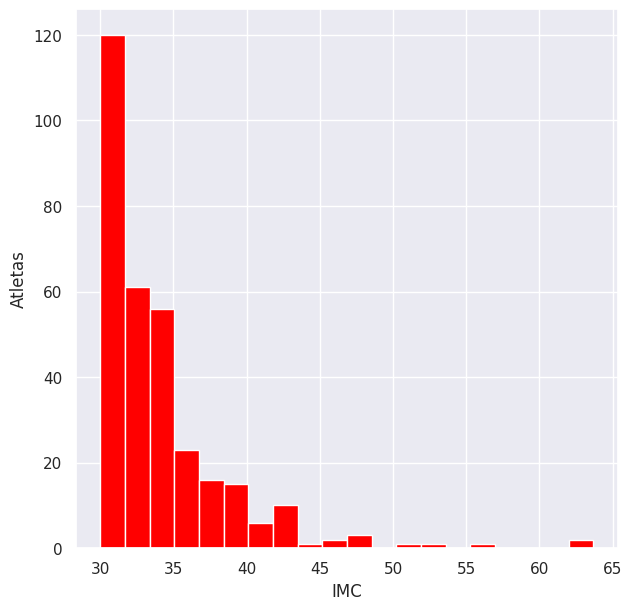

In [29]:
bmi_mascarado = data[data['BMI'] >= 30]['BMI']

plt.figure(figsize=(7,7))
plt.hist(bmi_mascarado,bins=20,color='red')
plt.ylabel('Atletas')
plt.xlabel('IMC')
plt.grid(True)
plt.show()

> Uma outra forma de visualizar distribuições é o *boxplot*. Trata-se de um gráfico no qual podemos observar os valores da amostra, incluindo *outliers*. Faça um *boxplot* para identificar *outliers* no atributo IMC.

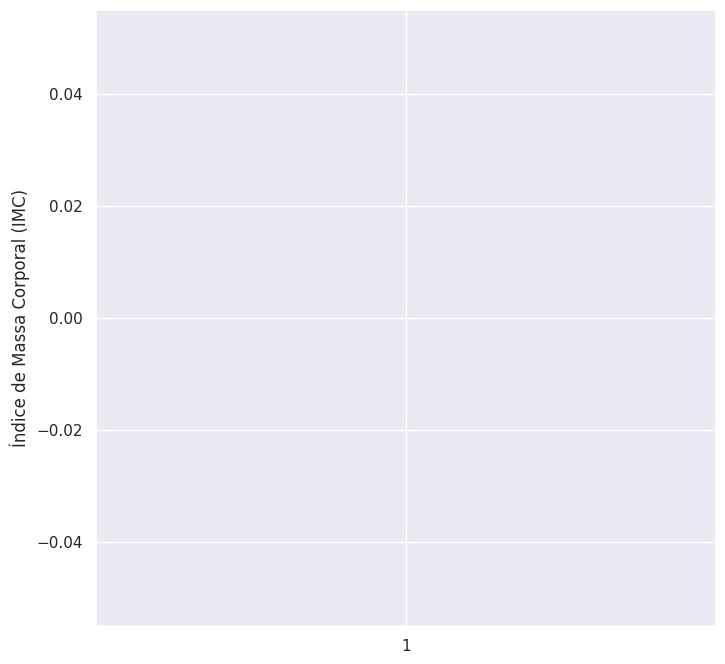

In [36]:
plt.figure(figsize=(8, 8))
plt.boxplot(data['BMI'])
plt.ylabel('Índice de Massa Corporal (IMC)')
plt.grid(True)
plt.show()

> Os *outliers* podem atrapalhar nossas aplicações de Aprendizado de Máquina. Existem diversas técnicas para lidar com *outliers* e uma delas é o *clipping*. O *clipping* é obtido determinando-se um ponto de corte em um atributo e agrupando todos os *outliers* com o valor do ponto de corte. Verifique quantos atletas possuem IMC entre 0 e 30 e quantos posuem IMC maior do que 30.

In [40]:
atletas_imc_0_30 = data[(data['BMI'] >= 0) & (data['BMI'] <= 30)]['BMI'].value_counts().sum()
atletas_imc_maior_30 = data[data['BMI'] > 30]['BMI'].value_counts().sum()

print("Número de atletas com IMC entre 0 e 30:", atletas_imc_0_30)
print("Número de atletas com IMC maior do que 30:", atletas_imc_maior_30)

Número de atletas com IMC entre 0 e 30: 8722
Número de atletas com IMC maior do que 30: 316


> Separe (guardando os índices) alguns atletas com IMC superior a 30.

In [41]:
atletas_indices = data[data['BMI'] > 30].index
atletas_indices

Index([    1,    81,   153,   160,   185,   220,   232,   239,   378,   408,
       ...
       10209, 10234, 10245, 10254, 10264, 10268, 10284, 10321, 10335, 10341],
      dtype='int64', length=316)

> No *clipping*, nós substituímos valores muito altos ou muito pequenos pelo ponto de corte. Aplique *clipping* no atributo IMC para que não haja atletas com IMC > 30.

**Observação**: você não deve *remover* do *data frame* atletas que tenham IMC maior do que 30. Mas qualquer IMC superior a 30 deve ser substituído por exatamente 30.

In [44]:
data['BMI'] = data['BMI'].clip(upper=30)

> Verifique o novo valor de IMC dos atletas que você separou anteriormente.

In [45]:
atletas_imc_0_30 = data[(data['BMI'] >= 0) & (data['BMI'] <= 30)]['BMI'].value_counts().sum()
atletas_imc_maior_30 = data[data['BMI'] > 30]['BMI'].value_counts().sum()

print("Número de atletas com IMC entre 0 e 30:", atletas_imc_0_30)
print("Número de atletas com IMC maior do que 30:", atletas_imc_maior_30)

Número de atletas com IMC entre 0 e 30: 9038
Número de atletas com IMC maior do que 30: 0


> Gere um novo histograma para verificar o IMC dos atletas, dos homens e das mulheres (são 3 histogramas; escolha o número adequado de *subplots* para mostrá-los).

In [46]:
data_fem = data[data['Sex'] == 'F']
data_masc = data[data['Sex'] == 'M']

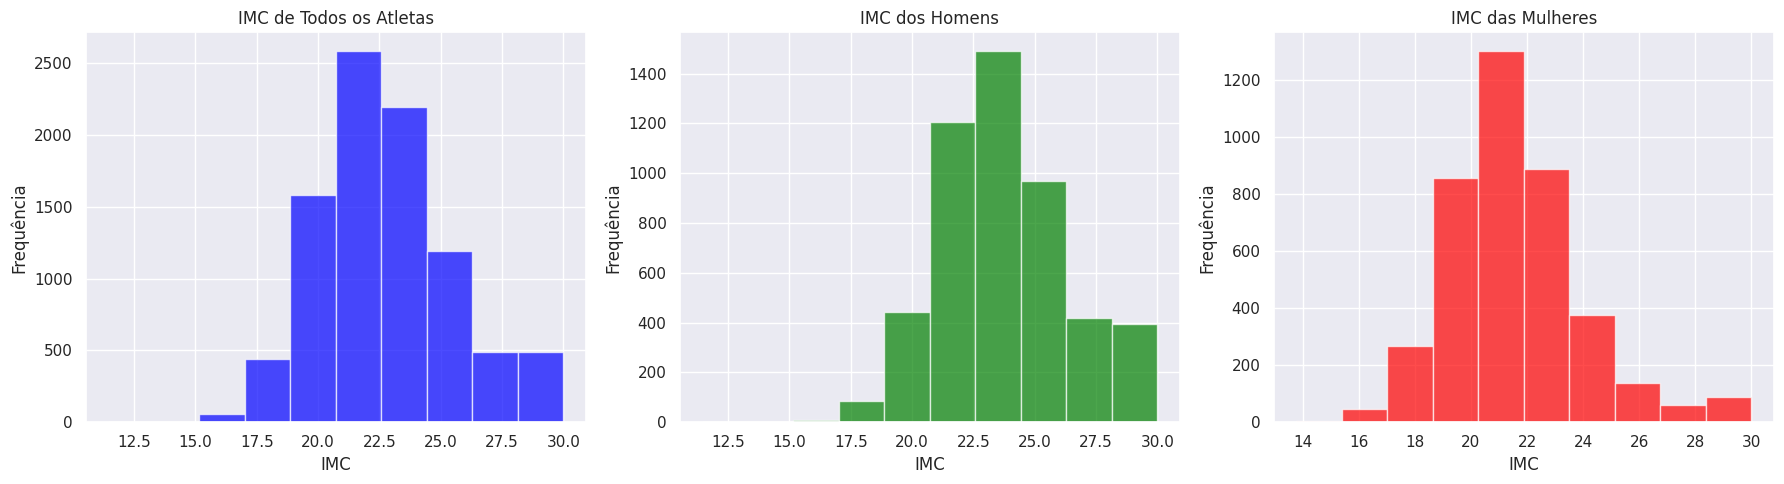

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))


axs[0].hist(data['BMI'], bins=10, color='blue', alpha=0.7)
axs[0].set_title('IMC de Todos os Atletas')
axs[0].set_xlabel('IMC')
axs[0].set_ylabel('Frequência')


axs[1].set_title('IMC dos Homens')
axs[1].hist(data_masc['BMI'], bins=10, color='green', alpha=0.7)
axs[1].set_xlabel('IMC')
axs[1].set_ylabel('Frequência')


axs[2].hist(data_fem['BMI'], bins=10, color='red', alpha=0.7)
axs[2].set_title('IMC das Mulheres')
axs[2].set_xlabel('IMC')
axs[2].set_ylabel('Frequência')


plt.tight_layout()
plt.show()